## Individual Analysis

In [88]:
# Folder to be analyzed
path = "../experiment_output/Experiment5/exp5_l1_init0.2/experiments_exp5_l1_init0.2_2"

### Analyze Sparsity

In [2]:
import torch
import os

def load_model_weights(model_path):
    """Load model weights from a .pth file."""
    checkpoint = torch.load(model_path, map_location=torch.device("cpu"))
    model_state = checkpoint["student_model_state_dict"]
    return {k: v.cpu().numpy() for k, v in model_state.items() if "weight" in k}

def compute_sparsity(weights_dict):
    """Compute the sparsity of model weights (per layer)."""
    sparsity = {}
    for layer_name, weights in weights_dict.items():
        num_elements = weights.size
        num_zeros = (abs(weights) < 1e-4).sum()
        sparsity[layer_name] = num_zeros / num_elements    
    return sparsity

def compute_layerwise_sparsity(directory):
    """Compute and print layer-wise sparsity for each model in a folder."""
    for root, _, files in os.walk(directory):
        for file in files:
            if not file.endswith(".pth"):
                continue

            model_path = os.path.join(root, file)
            weights_dict = load_model_weights(model_path)
            sparsity = compute_sparsity(weights_dict)

            print(f"\nModel: {file}")
            for layer_name, sparsity_value in sparsity.items():
                print(f"  {layer_name}: {sparsity_value * 100:.2f}% sparsity")

In [86]:
compute_layerwise_sparsity(path)


Model: multiChannelCNN_tanh__fcn_256_32_relu.pth
  layers.0.weight: 99.61% sparsity
  layers.1.weight: 99.99% sparsity
  layers.2.weight: 96.88% sparsity

Model: multiChannelCNN_relu__fcn_256_32_relu.pth
  layers.0.weight: 94.43% sparsity
  layers.1.weight: 98.47% sparsity
  layers.2.weight: 71.88% sparsity

Model: multiChannelCNN_sigmoid__fcn_256_32_tanh.pth
  layers.0.weight: 98.83% sparsity
  layers.1.weight: 99.96% sparsity
  layers.2.weight: 96.88% sparsity

Model: multiChannelCNN_sigmoid__fcn_256_32_relu.pth
  layers.0.weight: 70.67% sparsity
  layers.1.weight: 97.33% sparsity
  layers.2.weight: 90.62% sparsity

Model: multiChannelCNN_tanh__fcn_256_32_tanh.pth
  layers.0.weight: 99.61% sparsity
  layers.1.weight: 99.99% sparsity
  layers.2.weight: 96.88% sparsity

Model: multiChannelCNN_tanh__fcn_256_32_sigmoid.pth
  layers.0.weight: 100.00% sparsity
  layers.1.weight: 100.00% sparsity
  layers.2.weight: 0.00% sparsity

Model: multiChannelCNN_sigmoid__fcn_256_32_sigmoid.pth
  la

### Look at heatmaps

In [90]:
import os
import torch
import matplotlib.pyplot as plt
from matplotlib import gridspec

def load_model_weights(model_path):
    """Load model weights from a .pth file."""
    checkpoint = torch.load(model_path, map_location=torch.device("cpu"))
    model_state = checkpoint["student_model_state_dict"]
    return {k: v.cpu().numpy() for k, v in model_state.items() if "weight" in k}

def create_heatmaps(weights_dict):
    num_layers = len(weights_dict)

    # Bigger figure width to give heatmaps more space
    fig, axes = plt.subplots(num_layers, 1, figsize=(10, 1.5 * num_layers))
    if num_layers == 1:
        axes = [axes]

    im = None

    for i, (layer_name, weights) in enumerate(weights_dict.items()):
        ax = axes[i]
        rows, cols = weights.shape

        # Rotate if vertical
        if rows > cols:
            weights = weights.T
            rows, cols = weights.shape

        # Heatmap
        im = ax.imshow(weights, cmap="RdBu", aspect="equal", vmin=-2, vmax=2)

        # Clean, compact labels
        clean_name = f"Layer {int(layer_name.split('.')[1])+1}"
        ax.set_title(f"{clean_name} (dimension {rows}×{cols})", fontsize=11, pad=4)
        ax.invert_yaxis()
        if rows == 1:
            ax.set_yticks([])

    # Tightly pack subplots
    plt.subplots_adjust(left=0.06, right=0.86, top=0.94, bottom=0.06, hspace=0.05)

    # Add slim colorbar on the right
    cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    # Title
    #plt.suptitle(f"{model_name} - Weight Heatmaps", fontsize=13, y=0.985)
    plt.show()

In [91]:
def create_all_heatmaps(directory):
    model_files = [f for f in os.listdir(directory) if f.endswith(".pth")]
    for model_file in model_files:
        model_path = os.path.join(directory, model_file)
        print(f"\nLoading weights from {model_file}...")
        
        weights_dict = load_model_weights(model_path)
        create_heatmaps(weights_dict)
        sparsity = compute_sparsity(weights_dict)
        for layer_name, sparsity_value in sparsity.items():
            print(f"Sparsity of {layer_name}: {sparsity_value * 100:.2f}%")


Loading weights from multiChannelCNN_tanh__fcn_256_32_relu.pth...


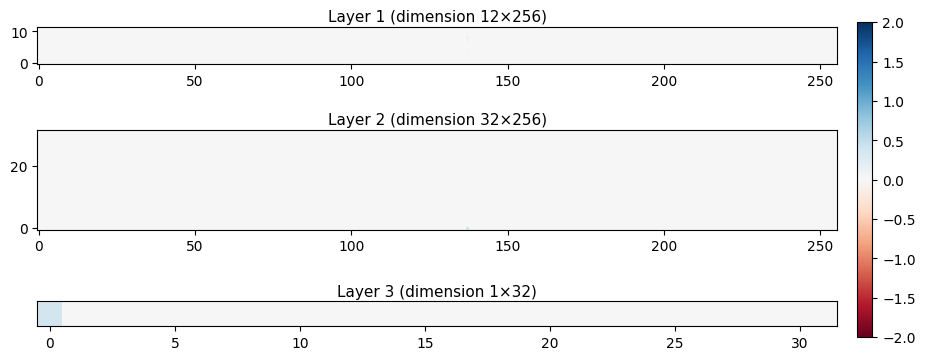

Sparsity of layers.0.weight: 99.61%
Sparsity of layers.1.weight: 99.99%
Sparsity of layers.2.weight: 96.88%

Loading weights from multiChannelCNN_relu__fcn_256_32_relu.pth...


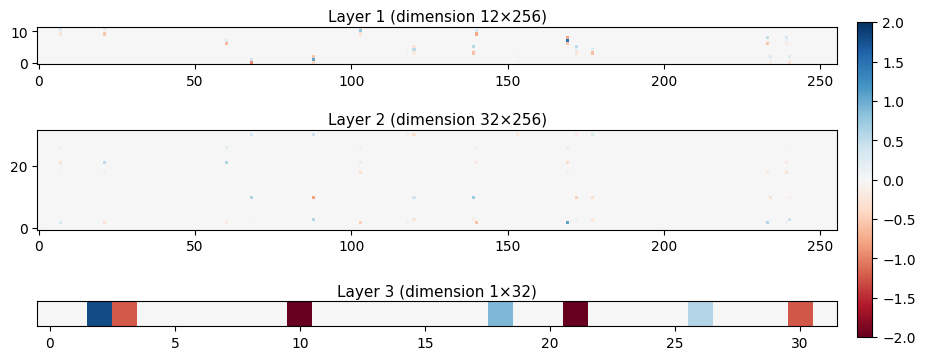

Sparsity of layers.0.weight: 93.39%
Sparsity of layers.1.weight: 98.63%
Sparsity of layers.2.weight: 78.12%

Loading weights from multiChannelCNN_sigmoid__fcn_256_32_tanh.pth...


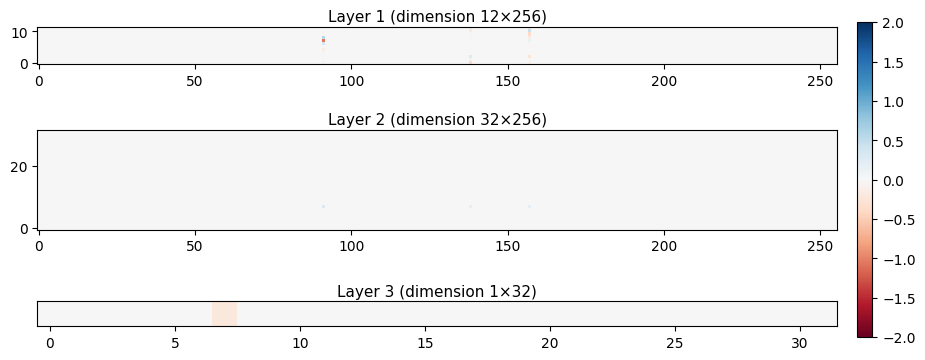

Sparsity of layers.0.weight: 98.83%
Sparsity of layers.1.weight: 99.96%
Sparsity of layers.2.weight: 96.88%

Loading weights from multiChannelCNN_sigmoid__fcn_256_32_relu.pth...


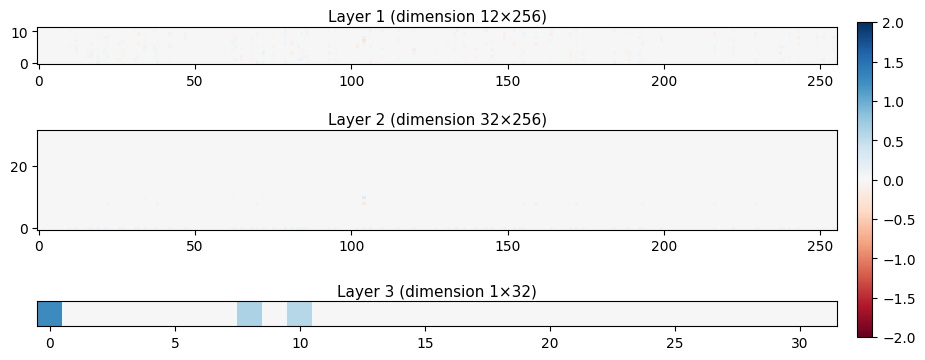

Sparsity of layers.0.weight: 71.94%
Sparsity of layers.1.weight: 97.41%
Sparsity of layers.2.weight: 90.62%

Loading weights from multiChannelCNN_relu__fcn_256_32_tanh.pth...


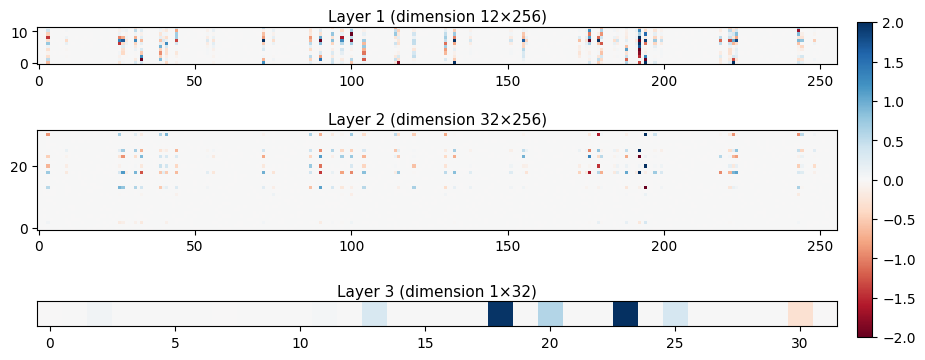

Sparsity of layers.0.weight: 80.50%
Sparsity of layers.1.weight: 95.14%
Sparsity of layers.2.weight: 75.00%

Loading weights from multiChannelCNN_tanh__fcn_256_32_tanh.pth...


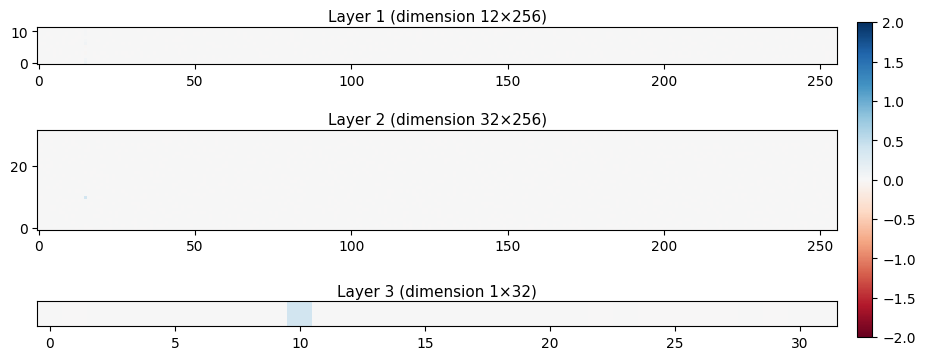

Sparsity of layers.0.weight: 99.61%
Sparsity of layers.1.weight: 99.99%
Sparsity of layers.2.weight: 96.88%

Loading weights from multiChannelCNN_tanh__fcn_256_32_sigmoid.pth...


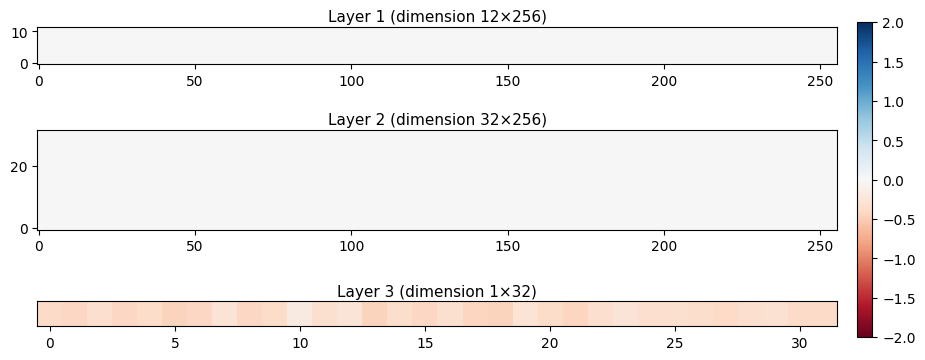

Sparsity of layers.0.weight: 100.00%
Sparsity of layers.1.weight: 100.00%
Sparsity of layers.2.weight: 0.00%

Loading weights from multiChannelCNN_sigmoid__fcn_256_32_sigmoid.pth...


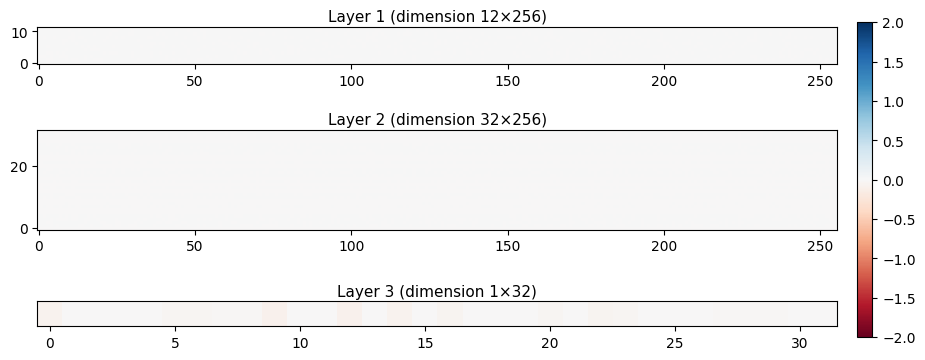

Sparsity of layers.0.weight: 100.00%
Sparsity of layers.1.weight: 100.00%
Sparsity of layers.2.weight: 0.00%

Loading weights from multiChannelCNN_relu__fcn_256_32_sigmoid.pth...


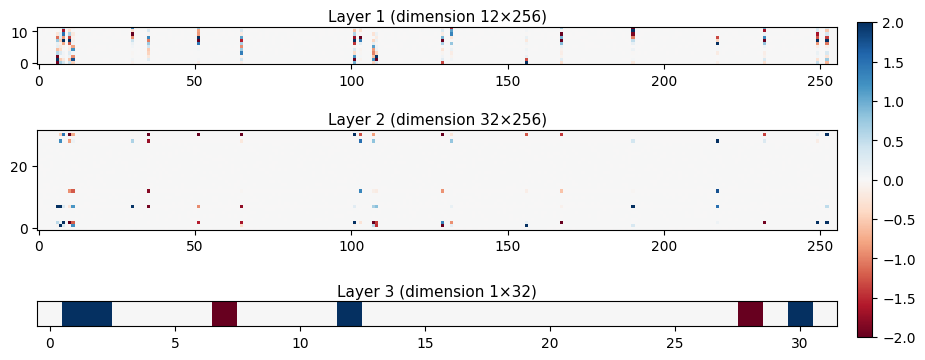

Sparsity of layers.0.weight: 91.41%
Sparsity of layers.1.weight: 81.27%
Sparsity of layers.2.weight: 0.00%


In [92]:
create_all_heatmaps(path)

## Multiple-Seeds Analysis

In [75]:
# Folder with multiple seed-subfolders to be analyzed
path_multiple = "../experiment_output/Experiment5/exp5_noReg_init1"

### Analyze Average Sparsity

In [67]:
import torch
import os


def load_model_weights(model_path):
    """Load model weights from a .pth file."""
    checkpoint = torch.load(model_path, map_location=torch.device("cpu"))
    model_state = checkpoint["student_model_state_dict"]
    return {k: v.cpu().numpy() for k, v in model_state.items() if "weight" in k}

# compute level of sparsity of model
def compute_sparsity(weights_dict):
    """Compute the sparsity of model weights."""
    sparsity = {}
    for layer_name, weights in weights_dict.items():
        num_elements = weights.size
        num_zeros = (abs(weights) < 1e-4).sum()
        sparsity[layer_name] = num_zeros / num_elements    
    return sparsity

def compute_avg_sparsity(directory):
    model_sparsities = {}  # model filename → average sparsity
    best_sparsity = float("-inf")

    for root, _, files in os.walk(directory):
        for file in files:
            if not file.endswith(".pth"):
                continue

            model_path = os.path.join(root, file)
            weights_dict = load_model_weights(model_path)
            sparsity = compute_sparsity(weights_dict)
            avg_sparsity = sum(sparsity.values()) / len(sparsity)

            # append avg sparsity to model_sparsities
            if file in model_sparsities:
                model_sparsities[file].append(avg_sparsity)
            else:
                # Initialize with the first value
                model_sparsities[file] = [avg_sparsity]

    print("\n========== Summary ==========")
    # print avg sparsity and std
    for model_file, avg in model_sparsities.items():
        avg_sparsity = sum(avg) / len(avg) * 100
        std_sparsity = (sum((x*100 - avg_sparsity) ** 2 for x in avg) / len(avg)) ** 0.5
        print(f"{model_file}: {avg_sparsity:.2f}% avg sparsity, {std_sparsity:.2f}% std deviation")



In [76]:
compute_avg_sparsity(path_multiple)


========== Summary ==========
multiChannelCNN_tanh__fcn_256_32_relu.pth: 0.04% avg sparsity, 0.01% std deviation
multiChannelCNN_relu__fcn_256_32_relu.pth: 0.24% avg sparsity, 0.42% std deviation
multiChannelCNN_sigmoid__fcn_256_32_tanh.pth: 0.51% avg sparsity, 0.37% std deviation
multiChannelCNN_sigmoid__fcn_256_32_relu.pth: 0.05% avg sparsity, 0.02% std deviation
multiChannelCNN_relu__fcn_256_32_tanh.pth: 0.21% avg sparsity, 0.42% std deviation
multiChannelCNN_tanh__fcn_256_32_tanh.pth: 0.15% avg sparsity, 0.07% std deviation
multiChannelCNN_tanh__fcn_256_32_sigmoid.pth: 0.05% avg sparsity, 0.01% std deviation
multiChannelCNN_sigmoid__fcn_256_32_sigmoid.pth: 0.06% avg sparsity, 0.01% std deviation
multiChannelCNN_relu__fcn_256_32_sigmoid.pth: 0.05% avg sparsity, 0.03% std deviation


### Get loss average

In [62]:
import os
import re
from collections import defaultdict

def get_loss_dict(root_dir):
    # Dictionary to store all losses grouped by model name
    loss_dict = defaultdict(list)

    # Regex patterns
    transition_pattern = re.compile(r"(multiChannelCNN_\w+ -> fcn_256_32_\w+)")
    loss_pattern = re.compile(r"Final Loss:\s*([\d\.eE+-]+)")

    # Walk through all subdirectories and files
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(subdir, file)
                current_key = None

                with open(file_path, "r") as f:
                    for line in f:
                        # Match model transition
                        transition_match = transition_pattern.search(line)
                        if transition_match:
                            current_key = transition_match.group(1)
                            continue

                        # Match final loss if inside a model block
                        if current_key:
                            loss_match = loss_pattern.search(line)
                            if loss_match:
                                final_loss = float(loss_match.group(1))
                                loss_dict[current_key].append(final_loss)
                                current_key = None  # reset for next block

    # Print average losses
    print("\n========== Final Loss Summary ==========")
    for key, losses in loss_dict.items():
        #print(f"Model: {key}", "entries:", len(losses))
        std_loss = (sum((x - (sum(losses) / len(losses))) ** 2 for x in losses) / len(losses)) ** 0.5
        avg_loss = sum(losses) / len(losses)
        print(f"{key}: Average Final Loss = {avg_loss:.4f} | Standard Deviation = {std_loss:.4f}")


In [63]:
get_loss_dict(path_multiple)


========== Final Loss Summary ==========
multiChannelCNN_sigmoid -> fcn_256_32_sigmoid: Average Final Loss = 0.0000 | Standard Deviation = 0.0000
multiChannelCNN_sigmoid -> fcn_256_32_relu: Average Final Loss = 0.1584 | Standard Deviation = 0.1201
multiChannelCNN_sigmoid -> fcn_256_32_tanh: Average Final Loss = 0.2655 | Standard Deviation = 0.1510
multiChannelCNN_relu -> fcn_256_32_sigmoid: Average Final Loss = 0.1086 | Standard Deviation = 0.1831
multiChannelCNN_relu -> fcn_256_32_relu: Average Final Loss = 0.3199 | Standard Deviation = 0.3520
multiChannelCNN_relu -> fcn_256_32_tanh: Average Final Loss = 0.1060 | Standard Deviation = 0.1077
multiChannelCNN_tanh -> fcn_256_32_sigmoid: Average Final Loss = 0.2535 | Standard Deviation = 0.0477
multiChannelCNN_tanh -> fcn_256_32_relu: Average Final Loss = 0.4573 | Standard Deviation = 0.1212
multiChannelCNN_tanh -> fcn_256_32_tanh: Average Final Loss = 0.0000 | Standard Deviation = 0.0000
